# Excel file data processing using PANDAS


## Using pandas to read data

Basic procedure:
 - import
 - open file and read_excel(), make dataframe
 - data processing through dataframe

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pathlib

plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (12,6)

In [6]:
file_full_path = pathlib.Path('D:/Edu/data_resource/movies.xls')

df = pd.read_excel(file_full_path)

type(df)

pandas.core.frame.DataFrame

When using read_excel() function, if sheet_name is not specified, it will default to <font color="red">0</font>, read the <font color="red">first sheet</font> of the excel file and return all data contained in pandas DataFrame.<br>
When specify the **sheet_name = None**, it will read **all sheets** and return dict, the keys are the sheet names, and values are DataFrame object containing data of each respective sheet.  

In [7]:
df.head()

,Title,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
0,Intolerance: Love's Struggle Throughout the Ages,1916,Drama|History|War,NaN,USA,Not Rated,123,1.33,385907.0,NaN,...,436,22,9.0,481,691,1,10718,88,69.0,8.0
1,Over the Hill to the Poorhouse,1920,Crime|Drama,NaN,USA,NaN,110,1.33,100000.0,3000000.0,...,2,2,0.0,4,0,1,5,1,1.0,4.8
2,The Big Parade,1925,Drama|Romance|War,NaN,USA,Not Rated,151,1.33,245000.0,NaN,...,81,12,6.0,108,226,0,4849,45,48.0,8.3
3,Metropolis,1927,Drama|Sci-Fi,German,Germany,Not Rated,145,1.33,6000000.0,26435.0,...,136,23,18.0,203,12000,1,111841,413,260.0,8.3
4,Pandora's Box,1929,Crime|Drama|Romance,German,Germany,Not Rated,110,1.33,NaN,9950.0,...,426,20,3.0,455,926,1,7431,84,71.0,8.0


Pandas automatically add one column of integer index. If you do not wang it can use `index_col=0` tells pandas there is no index column and do not add index column.

In our excel file 'movies.xlsx', has 3 sheets, each sheet contains data in exact same format (each row is same type of data and column in same order). So can use the following to read all data and put them into one dataframe.

In [8]:
all_sheets = pd.read_excel(file_full_path, sheet_name=None)
df = pd.concat(all_sheets.values(),keys=all_sheets.keys())

df.head()

Title    Year  \
1900s 0  Intolerance: Love's Struggle Throughout the Ages   1916.0   
      1                    Over the Hill to the Poorhouse   1920.0   
      2                                    The Big Parade   1925.0   
      3                                        Metropolis   1927.0   
      4                                     Pandora's Box   1929.0   

                      Genres Language  Country Content Rating  Duration  \
1900s 0    Drama|History|War      NaN      USA      Not Rated     123.0   
      1          Crime|Drama      NaN      USA            NaN     110.0   
      2    Drama|Romance|War      NaN      USA      Not Rated     151.0   
      3         Drama|Sci-Fi   German  Germany      Not Rated     145.0   
      4  Crime|Drama|Romance   German  Germany      Not Rated     110.0   

         Aspect Ratio     Budget  Gross Earnings  ...  \
1900s 0          1.33   385907.0             NaN  ...   
      1          1.33   100000.0       3000000.0  ...   
      2          1.33   245000.0             NaN  ...   
      3          1.33  6000000.0         26435.0  ...   
      4          1.33        NaN          9950.0  ...   

        Facebook Likes - Actor 1 Facebook Likes - Actor 2  \
1900s 0                    436.0                     22.0   
      1                      2.0                      2.0   
      2                     81.0                     12.0   
      3                    136.0                     23.0   
      4                    426.0                     20.0   

        Facebook Likes - Actor 3 Facebook Likes - cast Total  \
1900s 0                      9.0                         481   
      1                      0.0                           4   
      2                      6.0                         108   
      3                     18.0                         203   
      4                      3.0                         455   

         Facebook likes - Movie  Facenumber in posters  User Votes  \
1900s 0                     691                    1.0       10718   
      1                       0                    1.0           5   
      2                     226                    0.0        4849   
      3                   12000                    1.0      111841   
      4                     926                    1.0        7431   

         Reviews by Users  Reviews by Crtiics  IMDB Score  
1900s 0              88.0                69.0         8.0  
      1               1.0                 1.0         4.8  
      2              45.0                48.0         8.3  
      3             413.0               260.0         8.3  
      4              84.0                71.0         8.0  

[5 rows x 25 columns]

In [9]:
df.tail()

Title  Year  \
2010s 1599              War & Peace                NaN   
      1600                    Wings                NaN   
      1601               Wolf Creek                NaN   
      1602        Wuthering Heights                NaN   
      1603  Yu-Gi-Oh! Duel Monsters                NaN   

                                               Genres  Language    Country  \
2010s 1599                  Drama|History|Romance|War   English         UK   
      1600                               Comedy|Drama   English        USA   
      1601                      Drama|Horror|Thriller   English  Australia   
      1602                              Drama|Romance   English         UK   
      1603  Action|Adventure|Animation|Family|Fantasy  Japanese      Japan   

           Content Rating  Duration  Aspect Ratio  Budget  Gross Earnings  \
2010s 1599          TV-14       NaN         16.00     NaN             NaN   
      1600            NaN      30.0          1.33     NaN             NaN   
      1601            NaN       NaN          2.00     NaN             NaN   
      1602            NaN     142.0           NaN     NaN             NaN   
      1603            NaN      24.0           NaN     NaN             NaN   

            ... Facebook Likes - Actor 1 Facebook Likes - Actor 2  \
2010s 1599  ...                   1000.0                    888.0   
      1600  ...                    685.0                    511.0   
      1601  ...                    511.0                    457.0   
      1602  ...                  27000.0                    698.0   
      1603  ...                      0.0                      NaN   

           Facebook Likes - Actor 3 Facebook Likes - cast Total  \
2010s 1599                    502.0                        4528   
      1600                    424.0                        1884   
      1601                    206.0                        1617   
      1602                    427.0                       29196   
      1603                      NaN                           0   

            Facebook likes - Movie  Facenumber in posters  User Votes  \
2010s 1599                   11000                    1.0        9277   
      1600                    1000                    5.0        7646   
      1601                     954                    0.0         726   
      1602                       0                    2.0        6053   
      1603                     124                    0.0       12417   

            Reviews by Users  Reviews by Crtiics  IMDB Score  
2010s 1599              44.0                10.0         8.2  
      1600              56.0                19.0         7.3  
      1601               6.0                 2.0         7.1  
      1602              33.0                 9.0         7.7  
      1603              51.0                 6.0         7.0  

[5 rows x 25 columns]

The concate result is a MultiIndex dataframe. The first level of index is different sheet names, and second level index is the integer index automatically added by pandas when read the file.

In [10]:
df.shape

(5042, 25)

Now we can find that the data in second column, 'Year', has some problem. from the output of head(), we find it is in float format. from the tail(), we find there is many 'NaN'.

In [11]:
df.dtypes

Title                           object
Year                           float64
Genres                          object
Language                        object
Country                         object
Content Rating                  object
Duration                       float64
Aspect Ratio                   float64
Budget                         float64
Gross Earnings                 float64
Director                        object
Actor 1                         object
Actor 2                         object
Actor 3                         object
Facebook Likes - Director      float64
Facebook Likes - Actor 1       float64
Facebook Likes - Actor 2       float64
Facebook Likes - Actor 3       float64
Facebook Likes - cast Total      int64
Facebook likes - Movie           int64
Facenumber in posters          float64
User Votes                       int64
Reviews by Users               float64
Reviews by Crtiics             float64
IMDB Score                     float64
dtype: object

In [12]:
df.index

MultiIndex([('1900s',    0),
            ('1900s',    1),
            ('1900s',    2),
            ('1900s',    3),
            ('1900s',    4),
            ('1900s',    5),
            ('1900s',    6),
            ('1900s',    7),
            ('1900s',    8),
            ('1900s',    9),
            ...
            ('2010s', 1594),
            ('2010s', 1595),
            ('2010s', 1596),
            ('2010s', 1597),
            ('2010s', 1598),
            ('2010s', 1599),
            ('2010s', 1600),
            ('2010s', 1601),
            ('2010s', 1602),
            ('2010s', 1603)],
           length=5042)

In [13]:
df.columns

Index(['Title', 'Year', 'Genres', 'Language', 'Country', 'Content Rating',
       'Duration', 'Aspect Ratio', 'Budget', 'Gross Earnings', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3', 'Facebook Likes - Director',
       'Facebook Likes - Actor 1', 'Facebook Likes - Actor 2',
       'Facebook Likes - Actor 3', 'Facebook Likes - cast Total',
       'Facebook likes - Movie', 'Facenumber in posters', 'User Votes',
       'Reviews by Users', 'Reviews by Crtiics', 'IMDB Score'],
      dtype='object')

Let's check the 'Year' column data now.

In [14]:
df_new = df[['Year']]
df_new.shape

(5042, 1)

In [15]:
df_new.head()

Year
1900s 0  1916.0
      1  1920.0
      2  1925.0
      3  1927.0
      4  1929.0

In [16]:
df_new = df_new.dropna()
df_new.shape

(4935, 1)

In [17]:
df_new.head()

Year
1900s 0  1916.0
      1  1920.0
      2  1925.0
      3  1927.0
      4  1929.0

In [18]:
df_new.tail()

Year
2010s 1492  2016.0
      1493  2016.0
      1494  2016.0
      1495  2016.0
      1496  2016.0

In [19]:
df_new = df_new.astype({'Year':np.int32})
df_new.head()

Year
1900s 0  1916
      1  1920
      2  1925
      3  1927
      4  1929

In [20]:
df_new.tail()

Year
2010s 1492  2016
      1493  2016
      1494  2016
      1495  2016
      1496  2016

We can also see that the earnings, and budget, data also have some 'NaN', which we also need to check. The procedure to change them are similar to how to deal with the 'Year' column.


In [21]:
df.loc[(slice(None),0),:]

,,Title,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
1900s,0,Intolerance: Love's Struggle Throughout the Ages,1916.0,Drama|History|War,NaN,USA,Not Rated,123.0,1.33,385907.0,NaN,...,436.0,22.0,9.0,481,691,1.0,10718,88.0,69.0,8.0
2000s,0,102 Dalmatians,2000.0,Adventure|Comedy|Family,English,USA,G,100.0,1.85,85000000.0,66941559.0,...,2000.0,795.0,439.0,4182,372,1.0,26413,77.0,84.0,4.8
2010s,0,127 Hours,2010.0,Adventure|Biography|Drama|Thriller,English,USA,R,94.0,1.85,18000000.0,18329466.0,...,11000.0,642.0,223.0,11984,63000,0.0,279179,440.0,450.0,7.6


The above code will take one row from each sheet. You can see from above run result that we have 3 sheets in the excel file.

## Data filtering and study

After read in the data and put into dataframe object, we need to check the data, do validation, and filter out invalid data.  
If we want study the yearly earnings, we can filter those two columns.

From the above columns name, we can choose some column data we want to analyze.  
If we want stay the movie earnings by year, we can keep only the 'year' and 'gross earning' column.

In [22]:
df_new = df[['Year', 'Gross Earnings']]
df_new = df_new.dropna()
df_new = df_new.astype({'Year':np.int32})
df_new.head()

Year  Gross Earnings
1900s 1  1920       3000000.0
      3  1927         26435.0
      4  1929          9950.0
      5  1929       2808000.0
      8  1933       2300000.0

In [23]:
df_new.tail()

Year  Gross Earnings
2010s 1489  2016       6462576.0
      1490  2016      12626905.0
      1492  2016      46978995.0
      1494  2016     154985087.0
      1496  2016      28837115.0

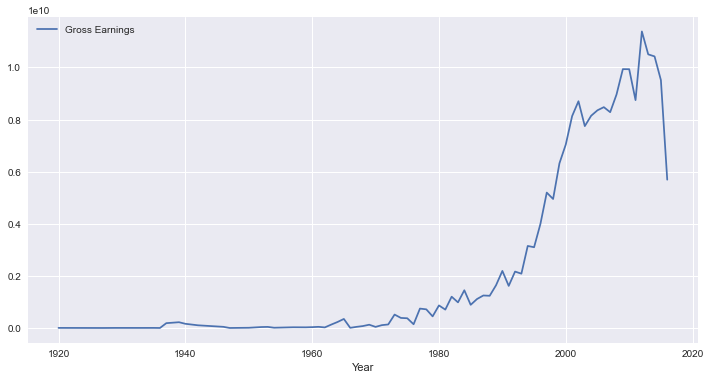

In [24]:
earning_by_year = df_new[['Year','Gross Earnings']].pivot_table(index='Year', aggfunc='sum')
earning_by_year.plot()
plt.show()

The result shows recent year total earning is dropping.

In [25]:
earning_by_year

,Gross Earnings
Year,
1920,3.000000e+06
1927,2.643500e+04
1929,2.817950e+06
1933,2.300000e+06
1935,3.000000e+06
...,...
2012,1.138011e+10
2013,1.050161e+10
2014,1.042283e+10


If we check per-movie average earning, then it would be:

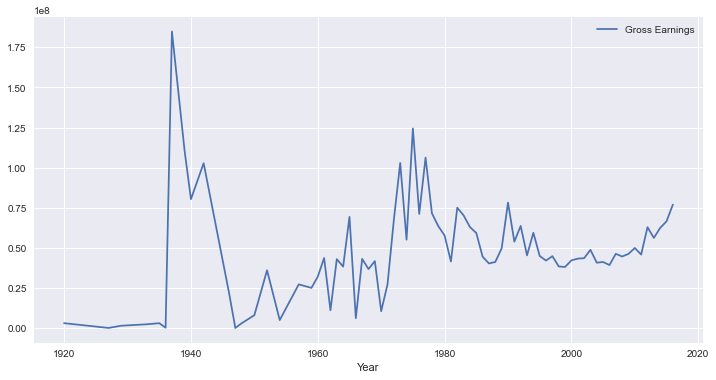

In [26]:
average_earning_by_year = df_new[['Year','Gross Earnings']].pivot_table(index='Year', aggfunc='mean')
average_earning_by_year.plot()
plt.show()

Now let's study the earning of individual movie.

In [27]:
df_new = df[['Title', 'Gross Earnings']]
df_new = df_new.dropna()
df_new.sort_values(['Gross Earnings'], ascending=False, inplace=True)
df_new.head(10)

Title  Gross Earnings
2000s 1867                                     Avatar      760505847.0
1900s 1027                                    Titanic      658672302.0
2010s 1263                             Jurassic World      652177271.0
      610                                The Avengers      623279547.0
      611                                The Avengers      623279547.0
2000s 1774                            The Dark Knight      533316061.0
1900s 1281  Star Wars: Episode I - The Phantom Menace      474544677.0
      226          Star Wars: Episode IV - A New Hope      460935665.0
2010s 1183                    Avengers: Age of Ultron      458991599.0
      618                       The Dark Knight Rises      448130642.0

In [28]:
df_new.shape

(4159, 2)

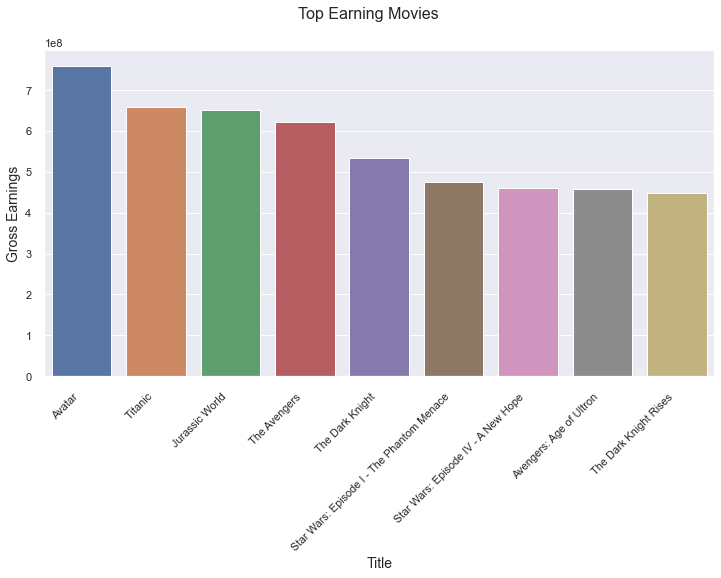

In [30]:
import seaborn as sns
sns.set( rc = {'figure.figsize' : (12, 6),\
                   'figure.titlesize' :16,\
                   'axes.labelsize' : 14 })
sns.barplot(x="Title", y="Gross Earnings", data=df_new.head(10)).get_figure().suptitle('Top Earning Movies')

plt.xticks(rotation=45,ha='right')
plt.show()

We can find that there is one row data is duplicated, which is 'The Avengers'. The plot is showing only 9 sample when we take head(10) which should have 10 items. When we check the table result it also showing clearly index 610 and 611 is same.  
This means that the previous study of yearly earning of all the movies, is also problem.  
So let's selete the 'Title' column and do some study. 

In [31]:
df_new=df[['Title']].copy()
df_new.shape

(5042, 1)

In [32]:
temp = df_new.groupby('Title')['Title'].transform('count')
temp

1900s  0       1
       1       1
       2       1
       3       1
       4       1
              ..
2010s  1599    1
       1600    1
       1601    1
       1602    1
       1603    1
Name: Title, Length: 5042, dtype: int64

Why here `transform()` can work? We know there are some movie titles are same thus one group has multiple items.  
The answer is because `transform('count')` is giving a scalar value, and it can be broadcasted back to fill each one (duplicate the value).  
So we see that the the total record is same, 5042, no change.

In [33]:
df_new['freq'] = df_new.groupby('Title')['Title'].transform('count')
df_new

Title  freq
1900s 0     Intolerance: Love's Struggle Throughout the Ages      1
      1                       Over the Hill to the Poorhouse      1
      2                                       The Big Parade      1
      3                                           Metropolis      1
      4                                        Pandora's Box      1
...                                                       ...   ...
2010s 1599                           War & Peace                  1
      1600                                 Wings                  1
      1601                            Wolf Creek                  1
      1602                     Wuthering Heights                  1
      1603               Yu-Gi-Oh! Duel Monsters                  1

[5042 rows x 2 columns]

In [34]:
df_filtered = df_new[df_new['freq']>1]
df_filtered

Title  freq
1900s 58    20,000 Leagues Under the Sea      2
      59    20,000 Leagues Under the Sea      2
      84                          Lolita      2
      85                          Lolita      2
      130       Night of the Living Dead      2
...                                   ...   ...
2010s 1479          The Legend of Tarzan      2
      1516           Dekalog                  2
      1517           Dekalog                  2
      1559      Saving Grace                  2
      1560      Saving Grace                  2

[245 rows x 2 columns]

Now let try to remove the duplicates.

In [35]:
df.drop_duplicates(subset='Title',inplace=True)
df.shape

(4916, 25)

Let's redo all the study above.

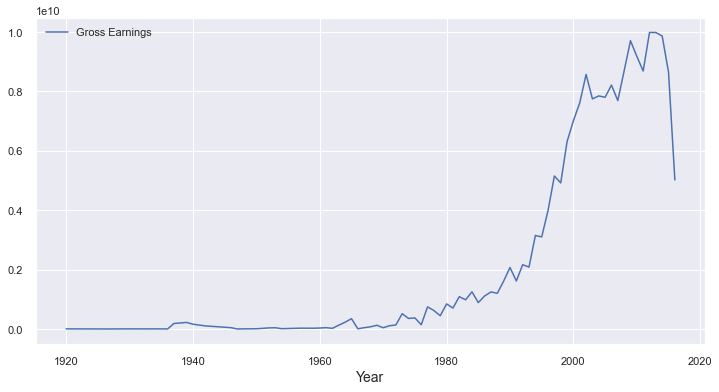

In [36]:
df_new = df[['Year', 'Gross Earnings']]
df_new = df_new.dropna()
df_new = df_new.astype({'Year':np.int32})
earning_by_year = df_new[['Year','Gross Earnings']].pivot_table(index='Year',aggfunc='sum')
earning_by_year.plot()
plt.show()

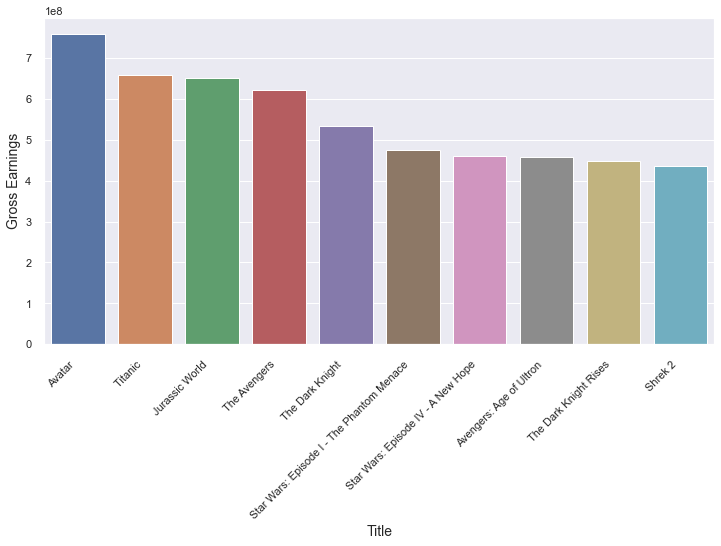

In [37]:
df_new = df[['Title', 'Gross Earnings']]
df_new = df_new.dropna()
df_new.sort_values(['Gross Earnings'], ascending=False, inplace=True)
sns.barplot(x="Title", y="Gross Earnings", data=df_new[['Title','Gross Earnings']].head(10))
plt.xticks(rotation=45,ha='right')
plt.show()

If we consider the 'Budget' column as cost, then we can create a 'Net Earnings' using the 'Gross Earnings' - 'Budget'.

In [38]:
df_new = df[['Title', 'Budget', 'Gross Earnings']]
df_new = df_new.dropna()
df_new['Net Earnings'] = df_new['Gross Earnings'] - df_new['Budget']

In [39]:
df_new

Title       Budget  Gross Earnings  \
1900s 1     Over the Hill to the Poorhouse      100000.0       3000000.0   
      3                         Metropolis     6000000.0         26435.0   
      5                The Broadway Melody      379000.0       2808000.0   
      8                        42nd Street      439000.0       2300000.0   
      11                           Top Hat      609000.0       3000000.0   
...                                     ...          ...             ...   
2010s 1489               The Young Messiah    18500000.0       6462576.0   
      1490                        Triple 9    20000000.0      12626905.0   
      1492                        Warcraft   160000000.0      46978995.0   
      1494               X-Men: Apocalypse   178000000.0     154985087.0   
      1496                     Zoolander 2    50000000.0      28837115.0   

            Net Earnings  
1900s 1        2900000.0  
      3       -5973565.0  
      5        2429000.0  
      8        1861000.0  
      11       2391000.0  
...                  ...  
2010s 1489   -12037424.0  
      1490    -7373095.0  
      1492  -113021005.0  
      1494   -23014913.0  
      1496   -21162885.0  

[3789 rows x 4 columns]

For those budget much more then gross earnings, we treat it as a losing money movie.

In [40]:
df_new = df_new.sort_values(['Net Earnings'], ascending=False)
df_new

Title        Budget  Gross Earnings  \
2000s 1867                              Avatar   2.370000e+08     760505847.0   
2010s 1263                      Jurassic World   1.500000e+08     652177271.0   
1900s 1027                             Titanic   2.000000e+08     658672302.0   
      226   Star Wars: Episode IV - A New Hope   1.100000e+07     460935665.0   
      328           E.T. the Extra-Terrestrial   1.050000e+07     434949459.0   
...                                         ...           ...             ...   
2000s 885                             Steamboy   2.127520e+09        410388.0   
1900s 986                    Princess Mononoke   2.400000e+09       2298191.0   
2000s 999                             Fateless   2.500000e+09        195888.0   
      1039                      Lady Vengeance   4.200000e+09        211667.0   
      1367                            The Host   1.221550e+10       2201412.0   

            Net Earnings  
2000s 1867  5.235058e+08  
2010s 1263  5.021773e+08  
1900s 1027  4.586723e+08  
      226   4.499357e+08  
      328   4.244495e+08  
...                  ...  
2000s 885  -2.127110e+09  
1900s 986  -2.397702e+09  
2000s 999  -2.499804e+09  
      1039 -4.199788e+09  
      1367 -1.221330e+10  

[3789 rows x 4 columns]

In [41]:
df_new1 = df_new.set_index('Title').stack().reset_index().set_index('Title').rename(columns={'level_1': 'category', 0: 'Values'})
df_new1

,category,Values
Title,,
Avatar,Budget,2.370000e+08
Avatar,Gross Earnings,7.605058e+08
Avatar,Net Earnings,5.235058e+08
Jurassic World,Budget,1.500000e+08
Jurassic World,Gross Earnings,6.521773e+08
...,...,...
Lady Vengeance,Gross Earnings,2.116670e+05
Lady Vengeance,Net Earnings,-4.199788e+09
The Host,Budget,1.221550e+10


In [42]:
df_new1.index[~df_new1.index.duplicated(keep='first')]

Index(['Avatar ', 'Jurassic World ', 'Titanic ',
       'Star Wars: Episode IV - A New Hope ', 'E.T. the Extra-Terrestrial ',
       'The Avengers ', 'The Lion King ',
       'Star Wars: Episode I - The Phantom Menace ', 'The Dark Knight ',
       'The Hunger Games ',
       ...
       'Kites ', 'Kabhi Alvida Naa Kehna ', 'Tango ', 'Godzilla 2000 ',
       'Akira ', 'Steamboy ', 'Princess Mononoke ', 'Fateless ',
       'Lady Vengeance ', 'The Host '],
      dtype='object', name='Title', length=3789)

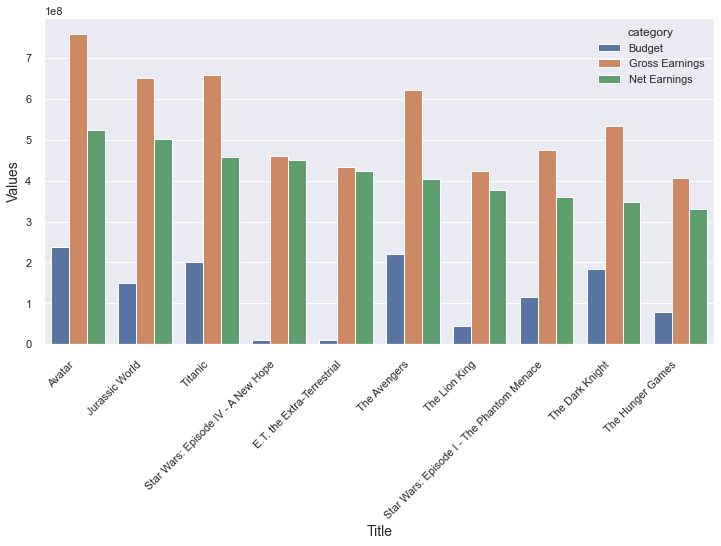

In [43]:
df_new2 = df_new1.head(30)
sns.barplot(x=df_new2.index, y='Values', hue='category', data=df_new2)
plt.xticks(rotation=45,ha='right')
plt.show()

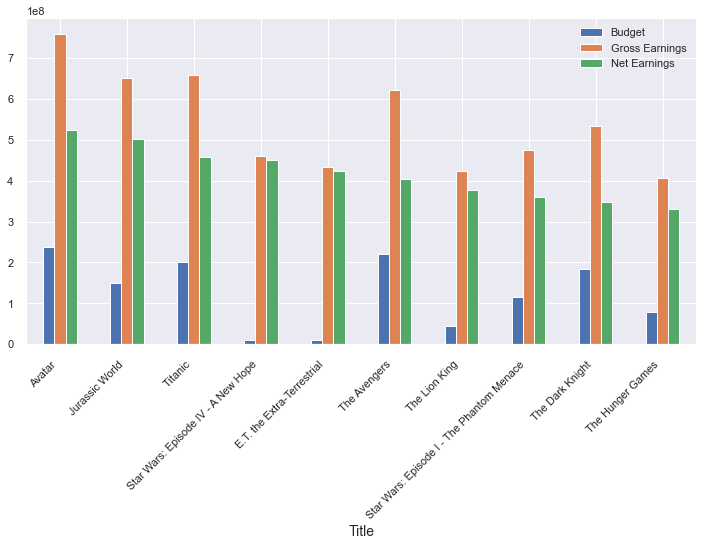

In [44]:
ax = df_new.head(10).plot(kind='bar', x='Title', y=['Budget','Gross Earnings','Net Earnings'], figsize=(12,6))
plt.xticks(rotation=45,ha='right')
plt.show()

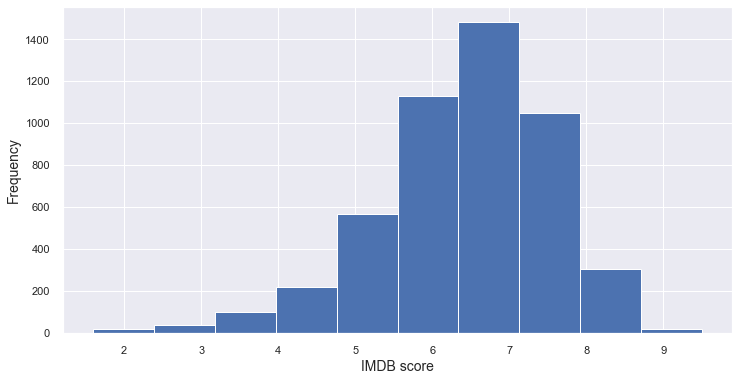

In [45]:
df['IMDB Score'].plot(kind="hist")
plt.xlabel('IMDB score')
plt.show()

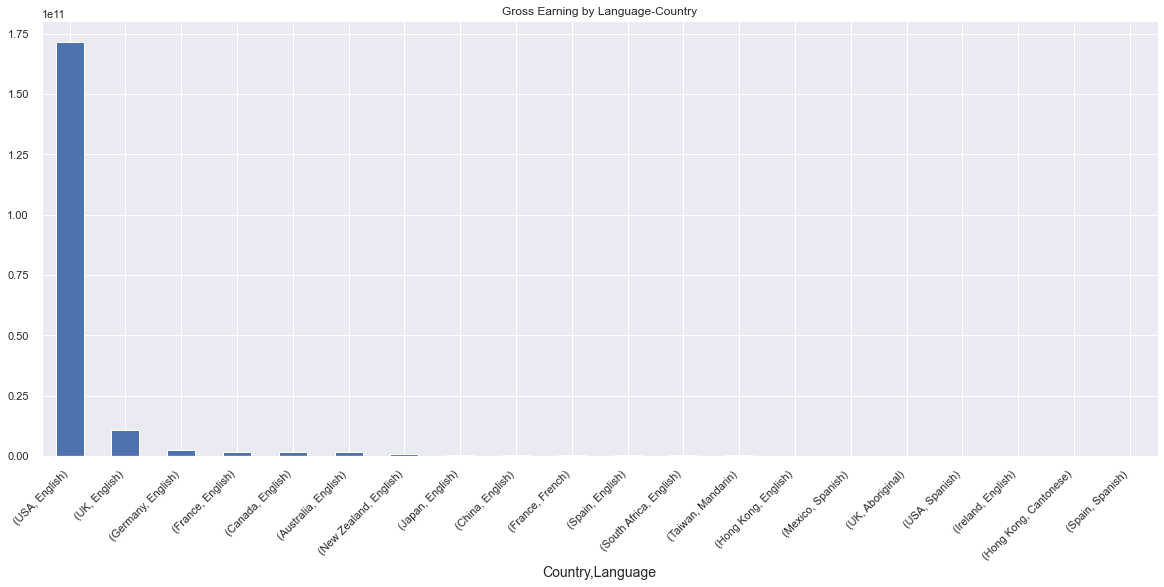

In [46]:
df_new = df[['Country', 'Language', 'Gross Earnings']]
earnings_by_country_lang = df_new.pivot_table(index=['Country', 'Language'],aggfunc='sum')
earnings_by_country_lang = earnings_by_country_lang.sort_values(['Gross Earnings'], ascending=False)
ax = earnings_by_country_lang.head(20).plot(kind='bar', figsize=(20,8))
ax.set_title('Gross Earning by Language-Country')
ax.get_legend().remove()
plt.xticks(rotation=45,ha='right')
plt.show()

Top earning are almost all English movies. And USA is way ahead all other countries.

### Output data to other file

In [48]:
writer = pd.ExcelWriter('output.xlsx', engine='xlsxwriter')
earnings_by_country_lang.to_excel(writer, sheet_name='report')
worksheet = writer.sheets['report']
workbook = writer.book
header_fmt = workbook.add_format({'bold': True})
worksheet.set_row(0, None, header_fmt)
writer.save()

There is no any output from here. You need to check your file folder and find if there is output.xlsx file, the time of the file creation is same time as when this was running.